<a href="https://colab.research.google.com/github/jcs-lambda/lambda-unit1-dhs-foia-fy18/blob/master/jcs_DS10_Unit1_DataStorytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Imports and initial setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup as bs4

plt.style.use('ggplot')

# Obtain the data

[FOIA Annual Reports | Homeland Security](https://www.dhs.gov/foia-annual-reports)

- [Cybersecurity and Infrastructure Security Agency](https://www.dhs.gov/sites/default/files/publications/CISA%20FY18%20Raw%20Data%20Template_0.xlsx)
- [Federal Emergency Management Agency](https://www.dhs.gov/sites/default/files/publications/FEMA%20FY18%20Raw%20Data%20Template.xlsx)
- [Federal Law Enforcement Training Centers](https://www.dhs.gov/sites/default/files/publications/FLETC%20FY18%20RAW%20DATA%20Template.xlsx)
 - did not use this one because I couldn't open the file in Google Sheets to see how to extract the data
- [Office of Intelligence and Analysis](https://www.dhs.gov/sites/default/files/publications/I%26A%20FY18%20Raw%20Data%20Template.xlsx)
- [U.S. Immigration and Customs Enforcement](https://www.dhs.gov/sites/default/files/publications/ICE%20FY18%20Raw%20Data%20Template.xlsx)
- [Office of Inspector General](https://www.dhs.gov/sites/default/files/publications/OIG%20FY18%20Raw%20Data%20Template.xlsx)
- [Privacy Office](https://www.dhs.gov/sites/default/files/publications/PRIV%20FY18%20Raw%20Data%20Template.xlsx)
- [Science and Technology Directorate](https://www.dhs.gov/sites/default/files/publications/S%26T%20FY18%20Raw%20Data%20Template.xlsx)
- [Transportation Security Administration](https://www.dhs.gov/sites/default/files/publications/TSA%20FY18%20Raw%20Data%20Template.xlsx)
- [United States Coast Guard](https://www.dhs.gov/sites/default/files/publications/USCG%20FY18%20Raw%20Data%20Template.xlsx)
- [United States Secret Service](https://www.dhs.gov/sites/default/files/publications/USSS%20FY18%20Raw%20Data%20Template.xlsx)

In [0]:
agencies = {
    'CISA':'Cybersecurity and Infrastructure Security Agency',
    'FEMA':'Federal Emergency Management Agency',
    'FLETC':'Federal Law Enforcement Training Centers',
    'I&A':'Office of Intelligence and Analysis',
    'ICE':'U.S. Immigration and Customs Enforcement',
    'OIG':'Office of Inspector General',
    'PRIV':'Privacy Office',
    'S&T':'Science and Technology Directorate',
    'TSA':'Transportation Security Administration',
    'USCG':'United States Coast Guard',
    'USSS':'United States Secret Service'
}

In [0]:
page_to_scrape = 'https://www.dhs.gov/foia-annual-reports'

page = requests.get(page_to_scrape)
soup = bs4(page.text, 'html.parser')

In [0]:
# only find the links that cover fiscal year 2018 that were submitted in the 'Template' format
# skip 'FLETC' because that spreadsheet was unable to be opened by Google Sheets
def href_parser(href):
  return 'FY18' in href and 'Template' in href and href.endswith('.xlsx') and not 'FLETC' in href

# links will be a dictionary with agency abbreviations as keys and the url to their data as the value
links = {}
for link in soup.find_all(name='a', attrs={'href':href_parser}):
  href = link.get('href')
  agency = href.split('/')[-1].split('%20')[0]
  agency = agency.replace('%26', '&')
  links[agency] = href

In [87]:
# dataframes will be a dictionary with the agency abbreviations as keys and the imported dataframes as the values
# 'USSS' spreadsheet has several empty rows at the end and will need to handled separately
dataframes = {}
for agency, url in links.items():
  print(agency, url)
  if agency == 'USSS':
    dataframes[agency] = pd.read_excel(url, sheet_name='Raw Data Requests', header=0, index_col=0, usecols='A:C,H:J,L:P,R', skiprows=[1], nrows=2716, parse_dates=True)
  else:
    dataframes[agency] = pd.read_excel(url, sheet_name='Raw Data Requests', header=0, index_col=0, usecols='A:C,H:J,L:P,R', skiprows=[1], parse_dates=True)

CISA https://www.dhs.gov/sites/default/files/publications/CISA%20FY18%20Raw%20Data%20Template_0.xlsx
FEMA https://www.dhs.gov/sites/default/files/publications/FEMA%20FY18%20Raw%20Data%20Template.xlsx
I&A https://www.dhs.gov/sites/default/files/publications/I%26A%20FY18%20Raw%20Data%20Template.xlsx
ICE https://www.dhs.gov/sites/default/files/publications/ICE%20FY18%20Raw%20Data%20Template.xlsx
OIG https://www.dhs.gov/sites/default/files/publications/OIG%20FY18%20Raw%20Data%20Template.xlsx
PRIV https://www.dhs.gov/sites/default/files/publications/PRIV%20FY18%20Raw%20Data%20Template.xlsx
S&T https://www.dhs.gov/sites/default/files/publications/S%26T%20FY18%20Raw%20Data%20Template.xlsx
TSA https://www.dhs.gov/sites/default/files/publications/TSA%20FY18%20Raw%20Data%20Template.xlsx
USCG https://www.dhs.gov/sites/default/files/publications/USCG%20FY18%20Raw%20Data%20Template.xlsx
USSS https://www.dhs.gov/sites/default/files/publications/USSS%20FY18%20Raw%20Data%20Template.xlsx


In [88]:
df = pd.concat(dataframes, names=['Agency']).reset_index(level=['Agency'])
print(f'Unique indexes: {len(df.index.unique())}')
print(f'DataFrame shape: {df.shape}')
df

Unique indexes: 125143
DataFrame shape: (125143, 12)


,Agency,Initial Request Type,Track Type,Initial Received Date,Perfected,Case Status,Days Opened,Closed Date,Days to Process,Disposition,"Disposition ""Other"" Reason",Exemptions Used
Request #,,,,,,,,,,,,
2017-OBFO-02364,CISA,OBIM FOIA,Complex,2016-11-04,NaT,Open,NaN,NaT,NaN,NaN,NaN,NaN
2017-OBFO-03060,CISA,OBIM FOIA,Complex,2016-10-21,NaT,Open,NaN,NaT,NaN,NaN,NaN,NaN
2017-OBFO-03260,CISA,OBIM FOIA,Simple,2016-11-28,NaT,Closed,NaN,2018-01-29,NaN,Other Reasons,NaN,NaN
2017-OBFO-03857,CISA,OBIM FOIA,Complex,2016-12-07,NaT,Closed,NaN,2017-10-23,NaN,Granted/Denied in Part,"(b)(6),(b)(7)(C),(b)(7)(E),(k)(2)",NaN
2017-OBFO-02413,CISA,OBIM FOIA,Complex,2016-11-03,NaT,Open,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20181461,USSS,FOIA,Simple,2018-09-24,2018-09-24,Open,4.0,NaT,NaN,NaN,NaN,NaN
20181462,USSS,FOIA/PA,Simple,2018-09-24,2018-09-24,Open,4.0,NaT,NaN,NaN,NaN,NaN
20181463,USSS,FOIA/PA,Simple,2018-09-27,2018-09-27,Open,1.0,NaT,NaN,NaN,NaN,NaN


# Explore the data

## Quick overview

In [89]:
df.isnull().sum()

Agency                             0
Initial Request Type               0
Track Type                         0
Initial Received Date              0
Perfected                     117597
Case Status                        0
Days Opened                    46990
Closed Date                     9250
Days to Process               118760
Disposition                     8653
Disposition "Other" Reason     89044
Exemptions Used                62050
dtype: int64

In [90]:
df.dtypes

Agency                                object
Initial Request Type                  object
Track Type                            object
Initial Received Date         datetime64[ns]
Perfected                     datetime64[ns]
Case Status                           object
Days Opened                          float64
Closed Date                   datetime64[ns]
Days to Process                      float64
Disposition                           object
Disposition "Other" Reason            object
Exemptions Used                       object
dtype: object

In [91]:
df.describe()

,Days Opened,Days to Process
count,78153.000000,6383.000000
mean,26.449631,95.782704
std,99.160567,181.307761
min,-8.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,25.000000
75%,8.000000,105.500000
max,1631.000000,1593.000000


In [92]:
df.describe(exclude='number')

,Agency,Initial Request Type,Track Type,Initial Received Date,Perfected,Case Status,Closed Date,Disposition,"Disposition ""Other"" Reason",Exemptions Used
count,125143,125143,125143,125143,7546,125143,115893,116490,36099,63093
unique,10,27,5,1401,979,7,370,6,138,461
top,ICE,ICE FOIA,Simple,2018-09-26 00:00:00,2018-05-22 00:00:00,Closed,2018-09-28 00:00:00,Granted/Denied in Part,"(b)(6),(b)(7)(C),(b)(7)(E)","(b)(6),(b)(7)(C),(b)(7)(E)"
freq,71199,70993,83438,1267,79,113617,1492,87013,18256,34919
first,NaN,NaN,NaN,2011-06-15 00:00:00,2011-12-02 00:00:00,NaN,2017-10-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-09-30 00:00:00,2018-09-28 00:00:00,NaN,2018-10-24 00:00:00,NaN,NaN,NaN


## Reduce the number of categories for some of the categorical data

Make a 'working copy' of the data for cleaning.

In [0]:
df2 = df.copy()

Check what there is to work with for categories with a 'collapseable' amount of unique values.

In [117]:
for column in df2.columns:
  if df2[column].dtype.name == 'object' and len(df2[column].unique()) < 30:
    print(df2[column].value_counts())
    print()

ICE     71199
CISA    40183
USCG     4562
USSS     2716
PRIV     2081
TSA      1729
FEMA     1678
OIG       426
I&A       364
S&T       205
Name: Agency, dtype: int64

ICE FOIA                70993
OBIM FOIA               39232
USCG FOIA                4403
HQ FOIA                  2021
FEMA FOIA                1658
FOIA                     1446
FOIA/PA                  1151
TSA FOIA                 1123
NPPD FOIA                 902
TSA Privacy Act           580
Initial Request           351
OIG FOIA                  307
ICE Consult               206
ST FOIA                   199
Consultation              119
OIG Privacy Act           106
USCG Privacy Act           97
USCG Consult               62
HQ Consult                 60
OBIM Consult               28
TSA Consult                26
NPPD Consult               20
FEMA Consult               20
OIG Consult                13
Initial Consultation       13
ST Consult                  6
NPPD Privacy Act            1
Name: Initial Request 

**Disposition**
 - Group similar dispositions
 - Fill NaNs with 'Unknown'.

In [95]:
df2['Disposition'].unique()

array([nan, 'Other Reasons', 'Granted/Denied in Part', 'Granted in Full',
       'Denied in Full', 'upheld', 'Partial Denial '], dtype=object)

In [96]:
df2['Disposition'] = df2['Disposition'].replace({'Partial Denial ':'Granted/Denied in Part', 'upheld':'Unknown'})
df2['Disposition'] = df2['Disposition'].fillna('Unknown')
df2['Disposition'].value_counts()

Granted/Denied in Part    87014
Other Reasons             22986
Unknown                    8654
Granted in Full            4722
Denied in Full             1767
Name: Disposition, dtype: int64

**Case Status**
 - Collapse all 'On Hold' statuses into one.
 - Fix capitalization.

In [97]:
df2['Case Status'].unique()

array(['Open', 'Closed', 'On Hold-Need Info/Clarification',
       'On Hold-Other', 'On Hold-Fee Related', 'open ', 'closed'],
      dtype=object)

In [98]:
df2['Case Status'] = df2['Case Status'].replace({'closed':'Closed', 'open ':'Open'})
df2['Case Status'] = df2['Case Status'].str.replace('^On Hold.*', 'On Hold')
df2['Case Status'].value_counts()

Closed     113628
Open        10930
On Hold       585
Name: Case Status, dtype: int64

**Track Type**
 - Fix capitalization.
 - Group 'Expedite' and 'Expedited' into 'Expedite'.

In [99]:
df2['Track Type'].unique()

array(['Complex', 'Simple', 'Expedite', 'Expedited', 'SImple'],
      dtype=object)

In [100]:
df2['Track Type'] = df2['Track Type'].replace({'SImple':'Simple', 'Expedited':'Expedite'})
df2['Track Type'].value_counts()

Simple      83439
Complex     41161
Expedite      543
Name: Track Type, dtype: int64

**Initial Request Type**
 - Remove agency specific classifications and any leading 'Initial '.
 - Clump 'Request' in with 'Consult'.
 - Group all 'Privacy Act'.

In [101]:
df2['Initial Request Type'].unique()

array(['OBIM FOIA', 'OBIM Consult', 'NPPD Consult', 'NPPD FOIA',
       'NPPD Privacy Act', 'FEMA FOIA', 'FEMA Consult', 'Initial Request',
       'Initial Consultation', 'ICE FOIA', 'ICE Consult', 'OIG Consult',
       'OIG FOIA', 'OIG Privacy Act', 'HQ FOIA', 'HQ Consult', 'ST FOIA',
       'ST Consult', 'TSA FOIA', 'TSA Privacy Act', 'TSA Consult',
       'USCG FOIA', 'USCG Privacy Act', 'USCG Consult', 'FOIA', 'FOIA/PA',
       'Consultation'], dtype=object)

In [102]:
df2['Initial Request Type'] = df2['Initial Request Type'].str.replace('^([A-Z]+|Initial) |ation$', '')
df2['Initial Request Type'] = df2['Initial Request Type'].replace({'Request':'Consult'})
df2['Initial Request Type'] = df2['Initial Request Type'].replace({'FOIA/PA':'Privacy Act'})
df2['Initial Request Type'].value_counts()

FOIA           122284
Privacy Act      1935
Consult           924
Name: Initial Request Type, dtype: int64

## Create some new columns categorizing the data by the fiscal year it was received.

In [0]:
# fiscal_years will be a dictionary with years as keys whose values are another dictionary
# with 'start' and 'end' as keys and pandas TimeStamps corresponding the start and end
# of that fiscal year as values
fiscal_years = {}
min_year = min(df2['Initial Received Date']).year
max_year = max(df2['Initial Received Date']).year + 1
for year in range(min_year, max_year):
  fiscal_years[year] = {
      'start' : pd.Timestamp(str(year-1)+'-10-01 00:00:00'),
      'end' : pd.Timestamp(str(year)+'-09-30 23:59:59')
  }

# returns the fiscal year of a TimeStamp based on the fiscal_years dictionary
def fiscal_year(timestamp):
  for year in fiscal_years:
    if timestamp >= fiscal_years[year]['start'] and timestamp <= fiscal_years[year]['end']:
      return year

In [104]:
# use the fiscal_year() function to return just the fiscal year for a given 'Initial Received Date'
df2['Fiscal Year Requested'] = df2['Initial Received Date'].apply(fiscal_year)
df2['Fiscal Year Requested'].value_counts()

2018    116683
2017      6111
2016      1110
2015       704
2014       349
2013       127
2012        52
2011         7
Name: Fiscal Year Requested, dtype: int64

Whether or not a request was backlogged from previous years.

In [105]:
# use the newly created 'Fiscal Year Requested' column to determine if a request was backlogged from previous years
df2['Backlogged Request'] = df2['Fiscal Year Requested'] < 2018
df2['Backlogged Request'].value_counts()

False    116683
True       8460
Name: Backlogged Request, dtype: int64

## The new, slightly cleaner data.

I didn't clean many NaN values because I ended up not needing to for the analysis I undertook.

In [106]:
df2

,Agency,Initial Request Type,Track Type,Initial Received Date,Perfected,Case Status,Days Opened,Closed Date,Days to Process,Disposition,"Disposition ""Other"" Reason",Exemptions Used,Fiscal Year Requested,Backlogged Request
Request #,,,,,,,,,,,,,,
2017-OBFO-02364,CISA,FOIA,Complex,2016-11-04,NaT,Open,NaN,NaT,NaN,Unknown,NaN,NaN,2017,True
2017-OBFO-03060,CISA,FOIA,Complex,2016-10-21,NaT,Open,NaN,NaT,NaN,Unknown,NaN,NaN,2017,True
2017-OBFO-03260,CISA,FOIA,Simple,2016-11-28,NaT,Closed,NaN,2018-01-29,NaN,Other Reasons,NaN,NaN,2017,True
2017-OBFO-03857,CISA,FOIA,Complex,2016-12-07,NaT,Closed,NaN,2017-10-23,NaN,Granted/Denied in Part,"(b)(6),(b)(7)(C),(b)(7)(E),(k)(2)",NaN,2017,True
2017-OBFO-02413,CISA,FOIA,Complex,2016-11-03,NaT,Open,NaN,NaT,NaN,Unknown,NaN,NaN,2017,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181461,USSS,FOIA,Simple,2018-09-24,2018-09-24,Open,4.0,NaT,NaN,Unknown,NaN,NaN,2018,False
20181462,USSS,Privacy Act,Simple,2018-09-24,2018-09-24,Open,4.0,NaT,NaN,Unknown,NaN,NaN,2018,False
20181463,USSS,Privacy Act,Simple,2018-09-27,2018-09-27,Open,1.0,NaT,NaN,Unknown,NaN,NaN,2018,False


# Analyze the data

## Create a new dataframe containing only the information I will be processing

In [107]:
columns_to_drop = ['Initial Request Type', 'Track Type', 'Initial Received Date', 'Perfected', 'Days Opened',
                   'Closed Date', 'Days to Process', 'Disposition', 'Disposition "Other" Reason', 'Exemptions Used']
df3 = df2.copy()
df3.drop(columns_to_drop, axis=1, inplace=True)
df3

,Agency,Case Status,Fiscal Year Requested,Backlogged Request
Request #,,,,
2017-OBFO-02364,CISA,Open,2017,True
2017-OBFO-03060,CISA,Open,2017,True
2017-OBFO-03260,CISA,Closed,2017,True
2017-OBFO-03857,CISA,Closed,2017,True
2017-OBFO-02413,CISA,Open,2017,True
...,...,...,...,...
20181461,USSS,Open,2018,False
20181462,USSS,Open,2018,False
20181463,USSS,Open,2018,False


## Calculate and plot the case status per agency

In [108]:
df_case_status_by_agency = pd.crosstab(df3['Agency'], df3['Case Status'], margins=True, margins_name='Total')
df_case_status_by_agency = df_case_status_by_agency.drop('Total')
df_case_status_by_agency = df_case_status_by_agency[['Closed', 'Open', 'On Hold', 'Total']]
df_case_status_by_agency

Case Status,Closed,Open,On Hold,Total
Agency,,,,
CISA,38055,1808,320,40183
FEMA,1401,266,11,1678
I&A,16,348,0,364
ICE,67477,3532,190,71199
OIG,238,188,0,426
PRIV,1482,577,22,2081
S&T,168,33,4,205
TSA,882,845,2,1729
USCG,2588,1938,36,4562


Adapted from Chris Albon's [Stacked Percentage Bar Plot in MatPlotLib](https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/).

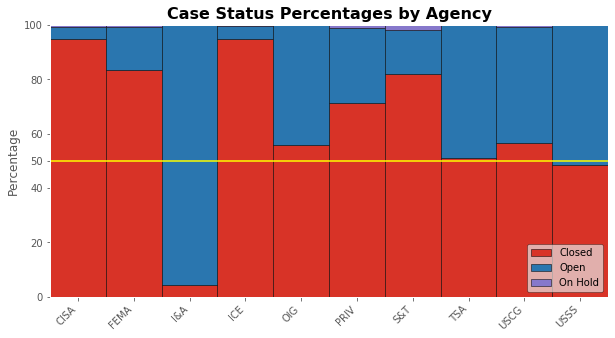

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.title('Case Status Percentages by Agency', fontsize=16, fontweight='bold')
plt.ylabel('Percentage')

bar_width = 1
positions = [i for i in range(len(df_case_status_by_agency))]
percentages = {}
bottoms = {}
bars = {}
colors = {
    'Closed':'#D83327',
    'Open':'#2A76AF',
    'On Hold':'#8678CB',
}
for status in colors.keys():
  percentages[status] = [i/j*100 for i, j in zip(df_case_status_by_agency[status], df_case_status_by_agency['Total'])]

bottoms['Closed'] = [0] * len(df_case_status_by_agency)
bottoms['Open'] = percentages['Closed']
bottoms['On Hold'] = list(np.add(percentages['Closed'], percentages['Open']))

for status in percentages.keys():
  bars[status] = ax.bar(positions, percentages[status], bottom=bottoms[status], width=bar_width, label=status, color=colors[status], edgecolor='black')

plt.xticks(positions, df_case_status_by_agency.index)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(bars.values(), bars.keys(), loc='lower right', edgecolor='black', framealpha=0.7)

plt.ylim((0, 100))
plt.xlim((-.5, 9.5))

plt.axhline(y=50, color='yellow')
plt.yticks([0, 20, 40, 50, 60, 80, 100])

plt.show()

## Calculate and plot case status counts by fiscal year of initial request for each agency

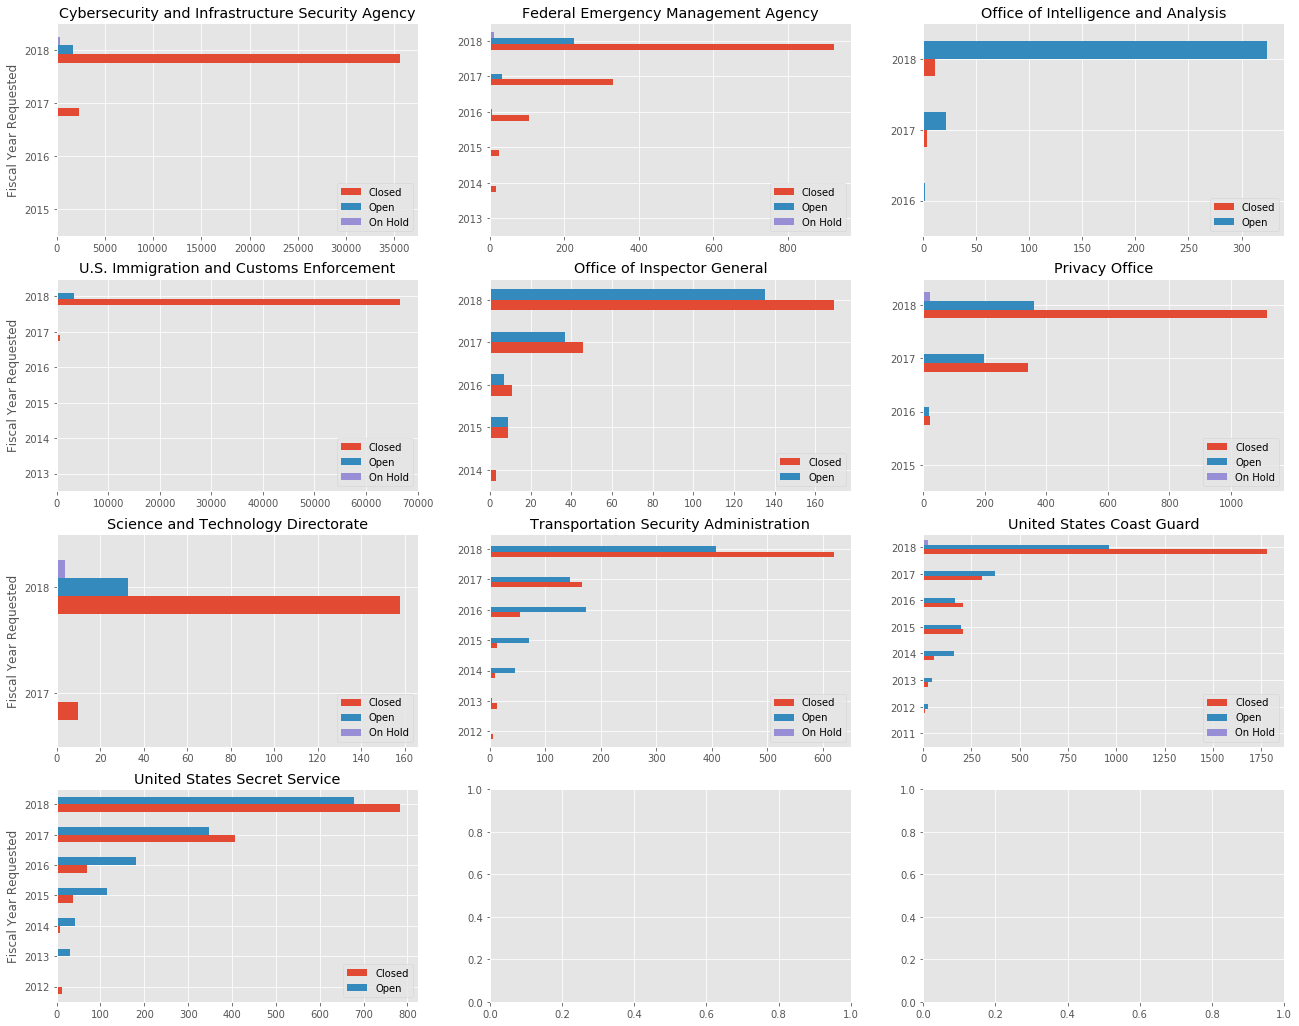

In [118]:
# caluculate the number of rows we need based on desired number of columns
# and how many plots we will be making
ncols = 3
nrows = len(df3['Agency'].unique()) // ncols
if len(df3['Agency'].unique()) % ncols > 0:
  nrows += 1

# plot_index is an iterator to move through the plots
plot_index = iter([(i, j) for i in range(nrows) for j in range(ncols)])

fig, plots = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22,18))
#fig.suptitle('Case Status Counts by Fiscal Year of Initial Request' , fontsize=16)

for agency, df_agency in df3.groupby(by='Agency'):
  pi = next(plot_index)
  ax = plots[pi]
  df_case_status_by_fiscal_year = pd.crosstab(df_agency['Fiscal Year Requested'], df_agency['Case Status'])

  # some agencies have no requests in an 'On Hold' status
  # for those that do, rearrange the columns so 'On Hold' is the last one
  # to maintain the same colors per status on each chart
  if 'On Hold' in df_case_status_by_fiscal_year.columns:
    df_case_status_by_fiscal_year = df_case_status_by_fiscal_year[['Closed', 'Open', 'On Hold']]

  df_case_status_by_fiscal_year.plot.barh(ax=ax)
  ax.set_title(agencies[agency])
  ax.legend(loc='lower right')

  # use the plot_index to remove the 'Fiscal Year Requested' label
  # on the plots that are not to the left side of the figure (column > 0)
  if pi[1] > 0:
    ax.set_ylabel(None)

plt.show()

In [111]:
# Dump the actual numbers used for the above plots

for agency, df_grouped in df3.groupby(by='Agency'):
  print('\n'+agencies[agency])
  df_grouped_status_by_year = pd.crosstab(df_grouped['Fiscal Year Requested'], df_grouped['Case Status'])

  # some agencies have no requests in an 'On Hold' status
  # for those that do, rearrange the columns so 'On Hold' is the last one
  if 'On Hold' in df_grouped_status_by_year.columns:
    df_grouped_status_by_year = df_grouped_status_by_year[['Closed', 'Open', 'On Hold']]

  print(df_grouped_status_by_year)


Cybersecurity and Infrastructure Security Agency
Case Status            Closed  Open  On Hold
Fiscal Year Requested                       
2015                       12     0        0
2016                       63     7        0
2017                     2341    89        1
2018                    35639  1712      319

Federal Emergency Management Agency
Case Status            Closed  Open  On Hold
Fiscal Year Requested                       
2013                        2     0        0
2014                       16     1        0
2015                       24     1        0
2016                      105     6        0
2017                      331    32        0
2018                      923   226       11

Office of Intelligence and Analysis
Case Status            Closed  Open
Fiscal Year Requested              
2016                        1     2
2017                        4    22
2018                       11   324

U.S. Immigration and Customs Enforcement
Case Status            C

## Run a $\chi^2$ test to see is there is a dependency between a request being backlogged and the case status

- null hypothesis: 'case status' and 'backlogged request' are independent
- alternate hypothesis: 'case status' and 'backlogged request' are independent
- confidence level: 95%

In [0]:
# runs a chi-squared test on two columns of data by
# creating a contingency table and using scipy.stats to run the test
# returns a dictionary with named keys for the return values
def chi2(column1, column2):
  observed = pd.crosstab(column1, column2, dropna=True)
  result = stats.chi2_contingency(observed)
  ret_values = ['chi-squared', 'p-value', 'dof', 'expected']
  return {k:v for k, v in zip(ret_values, result)}

In [114]:
# take a look at the contingency table
pd.crosstab(df3['Case Status'], df3['Backlogged Request'])

Backlogged Request,False,True
Case Status,,
Closed,107891,5737
On Hold,575,10
Open,8217,2713


In [116]:
chi2(df3['Case Status'], df3['Backlogged Request'])

{'chi-squared': 6208.212370170039,
 'dof': 2,
 'expected': array([[1.05946445e+05, 7.68155534e+03],
        [5.45452442e+02, 3.95475576e+01],
        [1.01911029e+04, 7.38897102e+02]]),
 'p-value': 0.0}

**Result:**
 - due to a p-value of 0, i reject the null hypothesis that these variables are independent and suggest that there is a dependece between 'case status' and 'backlogged request'
 - what that dependence is remains to be discovered through further analysis